In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [3]:
df=pd.read_csv('AmesHousing.csv')

In [4]:
df

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [6]:
df.corr()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Order,1.000000,0.173593,0.011797,-0.007034,0.031354,-0.048500,-0.011054,-0.052319,-0.075566,-0.030907,...,-0.011292,0.016355,0.027908,-0.024975,0.004307,0.052518,-0.006083,0.133365,-0.975993,-0.031408
PID,0.173593,1.000000,-0.001281,-0.096918,0.034868,-0.263147,0.104451,-0.343388,-0.157111,-0.229283,...,-0.051135,-0.071311,0.162519,-0.024894,-0.025735,-0.002845,-0.008260,-0.050455,0.009579,-0.246521
MS SubClass,0.011797,-0.001281,1.000000,-0.420135,-0.204613,0.039419,-0.067349,0.036579,0.043397,0.002730,...,-0.017310,-0.014823,-0.022866,-0.037956,-0.050614,-0.003434,-0.029254,0.000350,-0.017905,-0.085092
Lot Frontage,-0.007034,-0.096918,-0.420135,1.000000,0.491313,0.212042,-0.074448,0.121562,0.091712,0.222407,...,0.120084,0.163040,0.012758,0.028564,0.076666,0.173947,0.044476,0.011085,-0.007547,0.357318
Lot Area,0.031354,0.034868,-0.204613,0.491313,1.000000,0.097188,-0.034759,0.023258,0.021682,0.126830,...,0.157212,0.103760,0.021868,0.016243,0.055044,0.093775,0.069188,0.003859,-0.023085,0.266549
Overall Qual,-0.048500,-0.263147,0.039419,0.212042,0.097188,1.000000,-0.094812,0.597027,0.569609,0.429418,...,0.255663,0.298412,-0.140332,0.018240,0.041615,0.030399,0.005179,0.031103,-0.020719,0.799262
Overall Cond,-0.011054,0.104451,-0.067349,-0.074448,-0.034759,-0.094812,1.000000,-0.368773,0.047680,-0.135340,...,0.020344,-0.068934,0.071459,0.043852,0.044055,-0.016787,0.034056,-0.007295,0.031207,-0.101697
Year Built,-0.052319,-0.343388,0.036579,0.121562,0.023258,0.597027,-0.368773,1.000000,0.612095,0.313292,...,0.228964,0.198365,-0.374364,0.015803,-0.041436,0.002213,-0.011011,0.014577,-0.013197,0.558426
Year Remod/Add,-0.075566,-0.157111,0.043397,0.091712,0.021682,0.569609,0.047680,0.612095,1.000000,0.196928,...,0.217857,0.241748,-0.220383,0.037412,-0.046888,-0.011410,-0.003132,0.018048,0.032652,0.532974
Mas Vnr Area,-0.030907,-0.229283,0.002730,0.222407,0.126830,0.429418,-0.135340,0.313292,0.196928,1.000000,...,0.165467,0.143748,-0.110787,0.013778,0.065643,0.004617,0.044934,-0.000276,-0.017715,0.508285


In [8]:
df.corr()['SalePrice'].sort_values()

PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Order             -0.031408
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0

<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

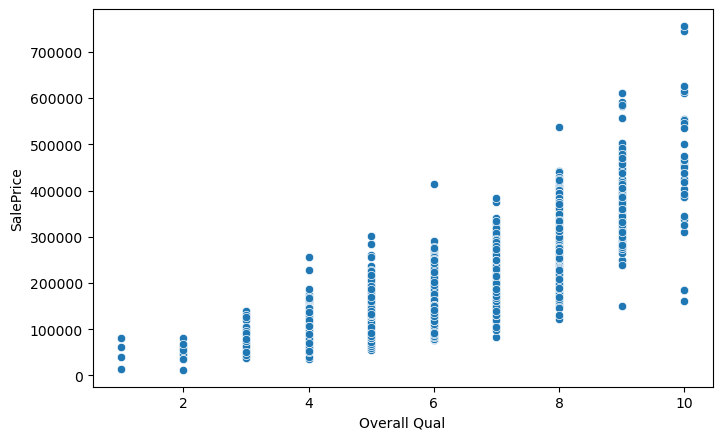

In [17]:
plt.figure(figsize=(8,5),dpi=100)
sns.scatterplot(x='Overall Qual',y='SalePrice',data=df)

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

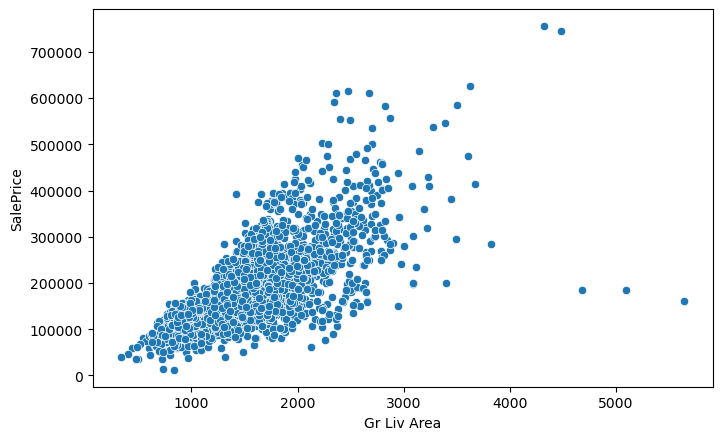

In [18]:
plt.figure(figsize=(8,5),dpi=100)
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=df)

Exploring the outlier

we can see from the scatter plot that there are three data that are an outlier with respect to "Gr Liv Area"

In [22]:
df[(df['Overall Qual']>8) & (df['SalePrice'])<200000]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [35]:
drop_index = df[(df['Gr Liv Area'] > 4000) & (df['SalePrice'] < 400000)].index

In [36]:
df=df.drop(drop_index, axis=0)













Plot the scatterplot without the outlier

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

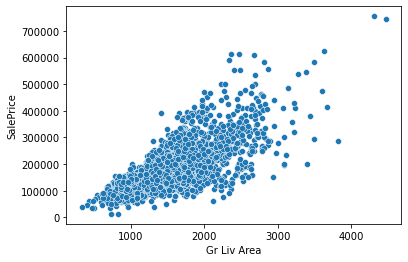

In [37]:
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=df)

<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

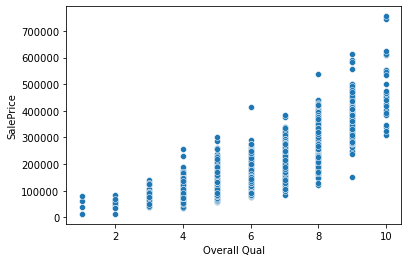

In [38]:
sns.scatterplot(x='Overall Qual',y='SalePrice',data=df)

In [39]:
df.to_csv("Ames_outliers_removed.csv",index=False)

# Dealing with Missing Data

In [40]:
df = pd.read_csv("Ames_outliers_removed.csv")

In [41]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


Removing the PID


We already have an index, so we don't need the PID unique identifier for the regression we will perform later on.

In [42]:
df = df.drop('PID', axis=1)

In [43]:
len(df.columns)

81

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2927 entries, 0 to 2926
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2927 non-null   int64  
 1   MS SubClass      2927 non-null   int64  
 2   MS Zoning        2927 non-null   object 
 3   Lot Frontage     2437 non-null   float64
 4   Lot Area         2927 non-null   int64  
 5   Street           2927 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2927 non-null   object 
 8   Land Contour     2927 non-null   object 
 9   Utilities        2927 non-null   object 
 10  Lot Config       2927 non-null   object 
 11  Land Slope       2927 non-null   object 
 12  Neighborhood     2927 non-null   object 
 13  Condition 1      2927 non-null   object 
 14  Condition 2      2927 non-null   object 
 15  Bldg Type        2927 non-null   object 
 16  House Style      2927 non-null   object 
 17  Overall Qual  

let see Now NaN values

In [45]:
df.isnull()

,Order,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2922,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2923,False,False,False,True,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2924,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2925,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [46]:
df.isnull().sum()

Order               0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 81, dtype: int64

Calculate the percentage of missing data

In [47]:
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [48]:
percent_nan = percent_missing(df)

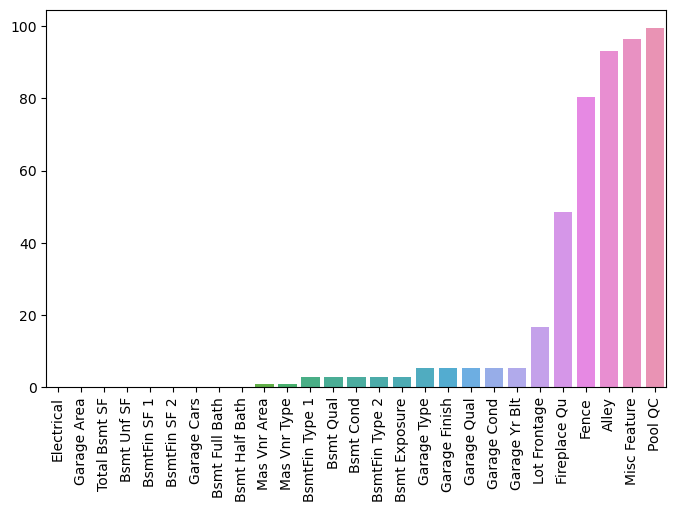

In [50]:
plt.figure(figsize=(8,5),dpi=100)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

# 2 Removing Features or Removing Rows


If only a few rows relative to the size of your dataset are missing some values, then it might just be a good idea to drop those rows.
Sometimes it is a good idea to remove a feature entirely if it has too many null values.

2.1 Working based on Rows Missing Data

Let's choose some threshold where we decide it is ok to drop a row if its missing some data (instead of attempting to fill in that missing data point). We will choose 1% as our threshold. This means if less than 1% of the rows are missing this feature, we will consider just dropping that row, instead of dealing with the feature itself.

(0.0, 1.0)

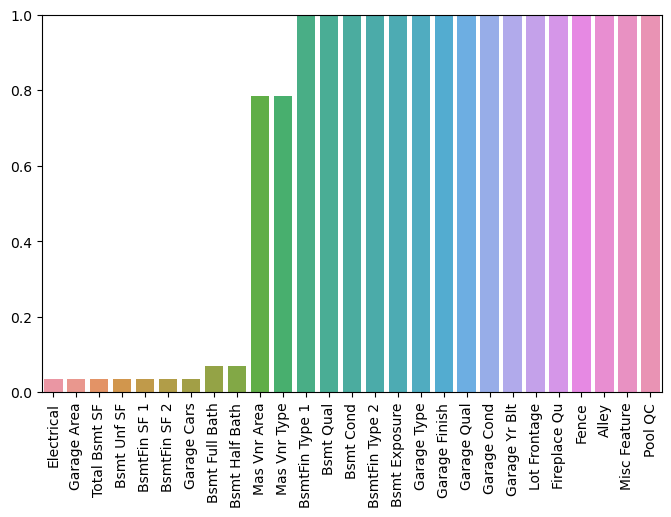

In [52]:
plt.figure(figsize=(8,5),dpi=100)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);
plt.ylim(0,1)

In [53]:
percent_nan[percent_nan < 1]

Electrical        0.034165
Garage Area       0.034165
Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
BsmtFin SF 1      0.034165
BsmtFin SF 2      0.034165
Garage Cars       0.034165
Bsmt Full Bath    0.068329
Bsmt Half Bath    0.068329
Mas Vnr Area      0.785787
Mas Vnr Type      0.785787
dtype: float64

In [54]:
100 / len(df)

0.0341646737273659

In [59]:
df[df['Electrical'].isnull()]['Garage Area']

1576    400.0
Name: Garage Area, dtype: float64

In [60]:
df[df['Bsmt Full Bath'].isnull()]

,Order,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,1342,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,1498,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [61]:
df[df['Bsmt Half Bath'].isnull()]

,Order,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,1342,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,1498,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


2.2 Dropping Rows

df.dropna() --- subset : array-like, optional Labels along other axis to consider, e.g. if you are dropping rows these would be a list of columns to include.

In [62]:
df=df.dropna(axis=0,subset=['Electrical','Garage Area'])

In [63]:
percent_nan = percent_missing(df)
percent_nan[percent_nan < 1]

Bsmt Unf SF       0.034188
Total Bsmt SF     0.034188
BsmtFin SF 2      0.034188
BsmtFin SF 1      0.034188
Bsmt Full Bath    0.068376
Bsmt Half Bath    0.068376
Mas Vnr Type      0.786325
Mas Vnr Area      0.786325
dtype: float64

Example of Filling in data based on column names:
    
    (Basement Columns)

There are 2 types of basement features, numerical and string descriptives.

1.
The numerical basement columns:

2.
The string basement columns:

In [77]:
#BSMT Numeric Columns ---> fillna--->0

bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

#BSMT String Columns --->fillna--->None

bsmt_str_cols = ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')


C:\Users\monis\AppData\Local\Temp\ipykernel_46108\2142055480.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)
C:\Users\monis\AppData\Local\Temp\ipykernel_46108\2142055480.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')


In [67]:
percent_nan = percent_missing(df)
percent_nan[percent_nan < 1]

Mas Vnr Type    0.786325
Mas Vnr Area    0.786325
dtype: float64

2.3 Mas Vnr Feature

Based on data, Mas Vnr Type and Mas Vnr Area being missing (NaN) is likely to mean the house simply just doesn't have a masonry veneer, in which case, we will fill in this data as we did before.

In [69]:
df["Mas Vnr Type"] = df["Mas Vnr Type"].fillna("None")
df["Mas Vnr Area"] = df["Mas Vnr Area"].fillna(0)

C:\Users\monis\AppData\Local\Temp\ipykernel_46108\3189550505.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Mas Vnr Type"] = df["Mas Vnr Type"].fillna("None")
C:\Users\monis\AppData\Local\Temp\ipykernel_46108\3189550505.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Mas Vnr Area"] = df["Mas Vnr Area"].fillna(0)


In [70]:
percent_nan = percent_missing(df)

(0.0, 1.0)

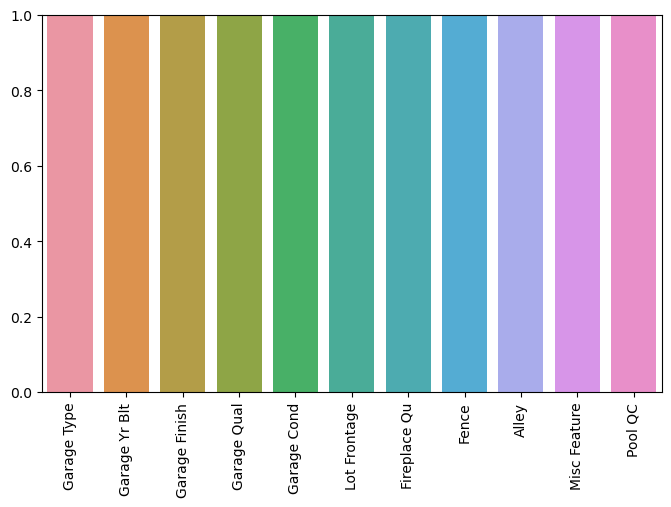

In [71]:
plt.figure(figsize=(8,5),dpi=100)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);
plt.ylim(0,1)

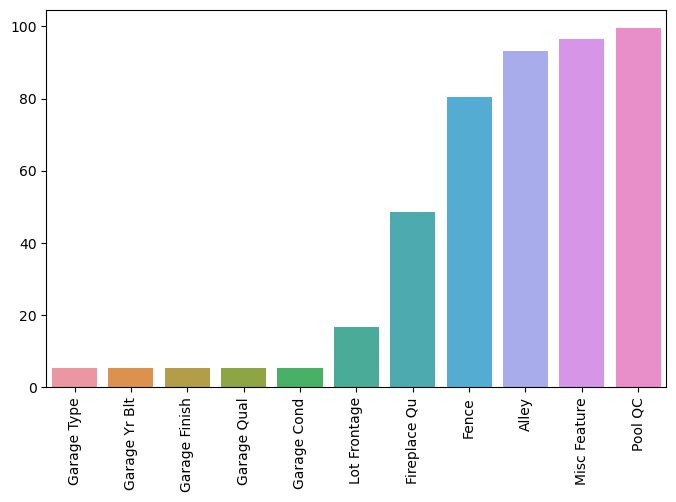

In [72]:
plt.figure(figsize=(8,5),dpi=100)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

3 Filling In Missing Column Data

Garage Columns
Based on the data description, these NaN seem to indicate no garage, so we will substitute with "None" or 0.

In [74]:
df[['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']]

,Garage Type,Garage Finish,Garage Qual,Garage Cond
0,Attchd,Fin,TA,TA
1,Attchd,Unf,TA,TA
2,Attchd,Unf,TA,TA
3,Attchd,Fin,TA,TA
4,Attchd,Fin,TA,TA
...,...,...,...,...
2922,Detchd,Unf,TA,TA
2923,Attchd,Unf,TA,TA
2924,NaN,NaN,NaN,NaN
2925,Attchd,RFn,TA,TA


In [75]:
gar_str_cols = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
df[gar_str_cols] = df[gar_str_cols].fillna('None')


C:\Users\monis\AppData\Local\Temp\ipykernel_46108\2115394863.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[gar_str_cols] = df[gar_str_cols].fillna('None')


In [76]:
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

C:\Users\monis\AppData\Local\Temp\ipykernel_46108\1710577415.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)


In [78]:
percent_nan = percent_missing(df)

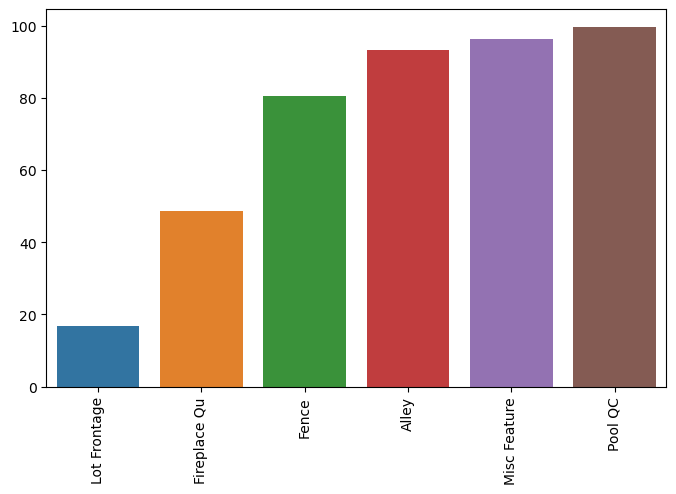

In [79]:
plt.figure(figsize=(8,5),dpi=100)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [80]:
df[['Lot Frontage', 'Fireplace Qu', 'Fence', 'Alley', 'Misc Feature','Pool QC']]

,Lot Frontage,Fireplace Qu,Fence,Alley,Misc Feature,Pool QC
0,141.0,Gd,NaN,NaN,NaN,NaN
1,80.0,NaN,MnPrv,NaN,NaN,NaN
2,81.0,NaN,NaN,NaN,Gar2,NaN
3,93.0,TA,NaN,NaN,NaN,NaN
4,74.0,TA,MnPrv,NaN,NaN,NaN
...,...,...,...,...,...,...
2922,37.0,NaN,GdPrv,NaN,NaN,NaN
2923,NaN,NaN,MnPrv,NaN,NaN,NaN
2924,62.0,NaN,MnPrv,NaN,Shed,NaN
2925,77.0,TA,NaN,NaN,NaN,NaN


In [81]:
df = df.drop(['Pool QC','Misc Feature','Alley','Fence'],axis=1)

In [82]:
percent_nan = percent_missing(df)

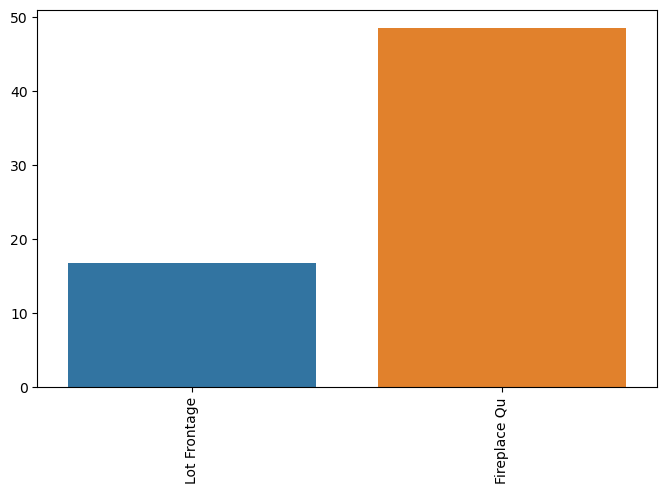

In [83]:
plt.figure(figsize=(8,5),dpi=100)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

Filling in Fireplace Quality based on Description Text

In [84]:
df['Fireplace Qu'].value_counts()

Gd    741
TA    600
Fa     75
Po     46
Ex     43
Name: Fireplace Qu, dtype: int64

In [85]:
df['Fireplace Qu']=df['Fireplace Qu'].fillna('None')

In [86]:
percent_nan = percent_missing(df)

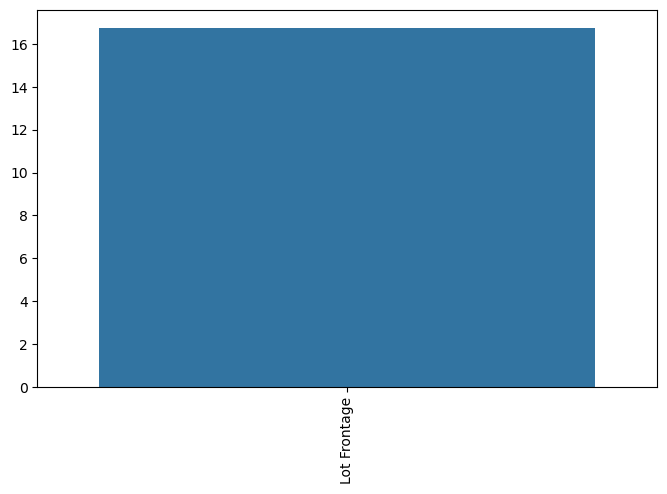

In [87]:
plt.figure(figsize=(8,5),dpi=100)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

4 Imputation of Missing Data

To impute missing data, we need to decide what other filled in (no NaN values) feature most probably relates and is correlated with the missing feature data. In this particular case we will use:

Neighborhood: Physical locations within Ames city limits

LotFrontage: Linear feet of street connected to property

We will operate under the assumption that the Lot Frontage is related to what neighborhood a house is in.

In [88]:
df['Neighborhood'].unique()

array(['NAmes', 'Gilbert', 'StoneBr', 'NWAmes', 'Somerst', 'BrDale',
       'NPkVill', 'NridgHt', 'Blmngtn', 'NoRidge', 'SawyerW', 'Sawyer',
       'Greens', 'BrkSide', 'OldTown', 'IDOTRR', 'ClearCr', 'SWISU',
       'Edwards', 'CollgCr', 'Crawfor', 'Blueste', 'Mitchel', 'Timber',
       'MeadowV', 'Veenker', 'GrnHill', 'Landmrk'], dtype=object)

<AxesSubplot:xlabel='Lot Frontage', ylabel='Neighborhood'>

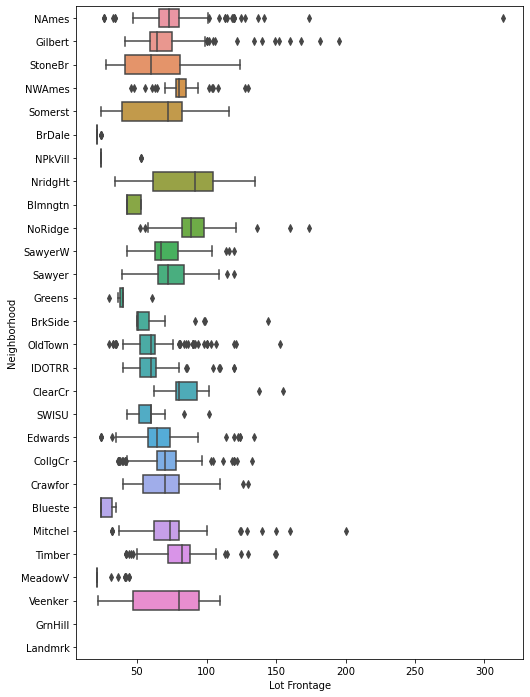

In [89]:
plt.figure(figsize=(8, 12))
sns.boxplot(x='Lot Frontage', y='Neighborhood', data=df, orient='h')

4.1 Impute Missing Data based on other Features¶

In [90]:
df.groupby('Neighborhood')['Lot Frontage']

In [91]:
df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

4.2 Transform Data

In [92]:
df.head()['Lot Frontage']


0    141.0
1     80.0
2     81.0
3     93.0
4     74.0
Name: Lot Frontage, dtype: float64

In [93]:
df[df['Lot Frontage'].isnull()]

,Order,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
11,12,20,RL,NaN,7980,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,500,3,2010,WD,Normal,185000
14,15,120,RL,NaN,6820,Pave,IR1,Lvl,AllPub,Corner,...,0,0,140,0,0,6,2010,WD,Normal,212000
22,23,60,FV,NaN,7500,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,1,2010,WD,Normal,216000
23,24,20,RL,NaN,11241,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,0,0,700,3,2010,WD,Normal,149000
24,25,20,RL,NaN,12537,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,0,0,0,4,2010,WD,Normal,149900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2891,2895,20,RL,NaN,16669,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,1,2006,WD,Normal,228000
2894,2898,60,RL,NaN,11170,Pave,IR2,Lvl,AllPub,Corner,...,0,0,0,0,0,4,2006,WD,Normal,250000
2895,2899,20,RL,NaN,8098,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,10,2006,WD,Normal,202000
2909,2913,90,RL,NaN,11836,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,3,2006,WD,Normal,146500


Add mean value to the missing data

In [145]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))

In [146]:
df['lot Frontage'].isnull().sum()

0

In [147]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

In [148]:
df['lot Frontage'].isnull().sum()

0

In [149]:
percent_nan = percent_missing(df)

In [150]:
percent_nan

Series([], dtype: float64)

We no longer have any missing data in our entire data set! lets' save this dataset

In [144]:
df.to_csv("Ames_NO_Missing_Data.csv",index=False)

# 5 Dealing with Categorical Data

In [151]:
df = pd.read_csv('Ames_NO_Missing_Data.csv')

In [158]:
df.head()

,Order,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,lot Frontage
0,1,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,5,2010,WD,Normal,215000,141.0
1,2,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,120,0,0,6,2010,WD,Normal,105000,80.0
2,3,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,12500,6,2010,WD,Normal,172000,81.0
3,4,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,4,2010,WD,Normal,244000,93.0
4,5,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,3,2010,WD,Normal,189900,74.0


5.1 Numerical Column to Categorical

In [160]:
df['MS SubClass'] = df['MS SubClass'].apply(str)

5.2 Creating Dummy Variables from Object Columns

In [161]:
df.select_dtypes(include='object')

,MS SubClass,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition
0,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,TA,Typ,Gd,Attchd,Fin,TA,TA,P,WD,Normal
1,20,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,TA,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
2,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Gd,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
3,20,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Ex,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
4,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,TA,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,80,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,...,TA,Typ,None,Detchd,Unf,TA,TA,Y,WD,Normal
2921,20,RL,Pave,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,...,TA,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
2922,85,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,TA,Typ,None,None,None,None,None,Y,WD,Normal
2923,20,RL,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [163]:
df_nums = df.select_dtypes(exclude='object')
df_objs = df.select_dtypes(include='object')

In [164]:
df_nums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2925 non-null   int64  
 1   Lot Frontage     2925 non-null   float64
 2   Lot Area         2925 non-null   int64  
 3   Overall Qual     2925 non-null   int64  
 4   Overall Cond     2925 non-null   int64  
 5   Year Built       2925 non-null   int64  
 6   Year Remod/Add   2925 non-null   int64  
 7   Mas Vnr Area     2925 non-null   float64
 8   BsmtFin SF 1     2925 non-null   float64
 9   BsmtFin SF 2     2925 non-null   float64
 10  Bsmt Unf SF      2925 non-null   float64
 11  Total Bsmt SF    2925 non-null   float64
 12  1st Flr SF       2925 non-null   int64  
 13  2nd Flr SF       2925 non-null   int64  
 14  Low Qual Fin SF  2925 non-null   int64  
 15  Gr Liv Area      2925 non-null   int64  
 16  Bsmt Full Bath   2925 non-null   float64
 17  Bsmt Half Bath

In [166]:
df_objs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Data columns (total 40 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   MS SubClass     2925 non-null   object
 1   MS Zoning       2925 non-null   object
 2   Street          2925 non-null   object
 3   Lot Shape       2925 non-null   object
 4   Land Contour    2925 non-null   object
 5   Utilities       2925 non-null   object
 6   Lot Config      2925 non-null   object
 7   Land Slope      2925 non-null   object
 8   Neighborhood    2925 non-null   object
 9   Condition 1     2925 non-null   object
 10  Condition 2     2925 non-null   object
 11  Bldg Type       2925 non-null   object
 12  House Style     2925 non-null   object
 13  Roof Style      2925 non-null   object
 14  Roof Matl       2925 non-null   object
 15  Exterior 1st    2925 non-null   object
 16  Exterior 2nd    2925 non-null   object
 17  Mas Vnr Type    2925 non-null   object
 18  Exter Qu

Converting

In [168]:
df_objs_dummies = pd.get_dummies(df_objs, drop_first=True)

In [169]:
df_objs_dummies

,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2921,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2922,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2923,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [170]:
final_dataframe = pd.concat([df_nums, df_objs], axis=1)

In [171]:
final_dataframe

,Order,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,1,141.000000,31770,6,5,1960,1960,112.0,639.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1,2,80.000000,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,0,0,1,0,0,0,1,0
2,3,81.000000,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,0,0,1,0,0,0,1,0
3,4,93.000000,11160,7,5,1968,1968,0.0,1065.0,0.0,...,0,0,0,0,1,0,0,0,1,0
4,5,74.000000,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,2926,37.000000,7937,6,6,1984,1984,0.0,819.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2921,2927,75.144444,8885,5,5,1983,1983,0.0,301.0,324.0,...,0,0,0,0,1,0,0,0,1,0
2922,2928,62.000000,10441,5,5,1992,1992,0.0,337.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2923,2929,77.000000,10010,5,5,1974,1975,0.0,1071.0,123.0,...,0,0,0,0,1,0,0,0,1,0


In [173]:
final_dataframe.to_csv('AMES_Final_DF.csv')
